# Glow-ViT results visualized

This is a script that's intended to visualize the performance of various Glow-ViT models evaluated on the low-light exposure datasets we currently have:

1. wildlife_very_dark_test
2. wildlife_grayscale
3. wildlife_less_saturated
4. wildlife_underexposed

## Results:

> Glow-ViT

```
***** glow-vit | testing on yin30lei/wildlife_very_dark_test  metrics *****
  eval_loss                   =     4.3495
  eval_samples_per_second     =     21.118
***** glow-vit | testing on yin30lei/wildlife_grayscale  metrics *****
  eval_loss                   =     0.2021
  eval_samples_per_second     =     13.231
***** glow-vit | testing on yin30lei/wildlife_less_saturated  metrics *****
  eval_loss                   =      0.176
  eval_samples_per_second     =     20.086
***** glow-vit | testing on yin30lei/wildlife_underexposed  metrics *****
  eval_loss                   =      0.351
  eval_samples_per_second     =     20.162
```

> Glow-ViT-dark

```
***** glow-vit-dark | testing on yin30lei/wildlife_very_dark_test  metrics *****
  eval_loss                   =     0.4528
  eval_samples_per_second     =     19.035
***** glow-vit-dark | testing on yin30lei/wildlife_grayscale  metrics *****
  eval_loss                   =     0.2992
  eval_samples_per_second     =     12.997
***** glow-vit-dark | testing on yin30lei/wildlife_less_saturated  metrics *****
  eval_loss                   =     0.3231
  eval_samples_per_second     =     21.418
***** glow-vit-dark | testing on yin30lei/wildlife_underexposed  metrics *****
  eval_loss                   =     
  eval_samples_per_second     =     
```



|eval_loss| original | very dark | illuminate | mixed | very dark test | grayscale | less saturated | underexposed |
|--|---------|------------|------------|-------|----------------|-----------|----------------|----|
|Glow-ViT|---------|------------|------------|-------|----------------|-----------|----------------|----|
|Glow-ViT-Dark|---------|------------|------------|-------|----------------|-----------|----------------|0.2702|
|Glow-ViT-Illuminate|---------|------------|------------|-------|2.2027|0.3929     |0.4334          |0.5756|
|Glow-ViT-Mix|---------|------------|------------|-------|0.1396       | 0.0776   | 0.0707 |0.0472|


### Evaluation speed

|eval_samples_per_second| original | very dark | illuminate | mixed | very dark test | grayscale | less saturated | underexposed |
|--|---------|------------|------------|-------|----------------|-----------|----------------|----|
|Glow-ViT|---------|------------|------------|-------|----------------|-----------|----------------|----|
|Glow-ViT-Dark|---------|------------|------------|-------|----------------|-----------|----------------|21.862|
|Glow-ViT-Illuminate|---------|------------|------------|-------|19.711             |12.803            |19.972|20.094|
|Glow-ViT-Mix|---------|------------|------------|-------|21.091       | 13.254   | 21.135 |20.766|

In [44]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ["wildlife_very_dark_test", "wildlife_grayscale", "wildlife_less_saturated", "wildlife_underexposed"]
models = ["Glow-ViT", "Glow-ViT-dark", "Glow-ViT-illuminate", "Glow-ViT-mix"]
eval_loss = {
    "Glow-ViT": [4.3495, 0.2021, 0.176, 0.351],
    "Glow-ViT-dark": [0.4528, 0.2992, 0.3231, 0.2702],
    "Glow-ViT-illuminate": [2.2027, 0.3929, 0.4334, 0.5756],
    "Glow-ViT-mix": [0.1396, 0.0776, 0.0707, 0.0472]
}
eval_samples_per_second = {
    "Glow-ViT": [21.118, 13.231, 20.086, 20.162],
    "Glow-ViT-dark": [19.035, 12.997, 21.418, 21.862],
    "Glow-ViT-illuminate": [19.711, 12.803, 19.972, 20.094],
    "Glow-ViT-mix": [21.091, 13.254, 21.135, 20.766]
}

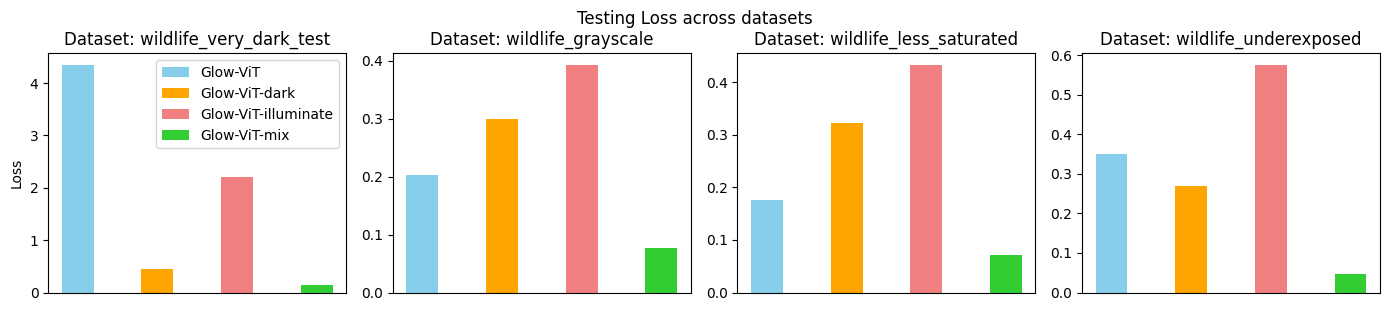

In [49]:

x = np.arange(len(models))
width = 0.4  # the width of the bars
colors = ["skyblue", "orange", "lightcoral", "limegreen"]

fig, axes = plt.subplots(1, 4, figsize=(14, 3), sharex=True)
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    ax = axes[i]
    for j, model in enumerate(models):
        ax.bar(x[j], eval_loss[model][i], width, label=model, color=colors[j])

    # Titles and labels
    ax.set_title(f"Dataset: {dataset}")
    ax.set_xticks([])
    # ax.set_xticklabels(models)
    if i % 4 == 0:
        ax.set_ylabel("Loss")
        ax.legend()

# General layout adjustments
plt.tight_layout()
plt.suptitle("Testing Loss across datasets", fontsize=12, y=1.02)
plt.show()


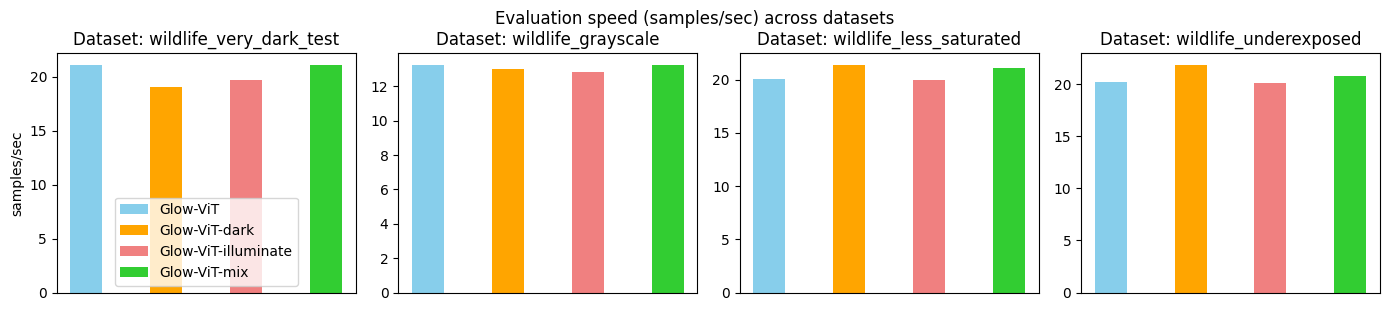

In [50]:

x = np.arange(len(models))
width = 0.4  # the width of the bars
colors = ["skyblue", "orange", "lightcoral", "limegreen"]

fig, axes = plt.subplots(1, 4, figsize=(14, 3), sharex=True)
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    ax = axes[i]
    for j, model in enumerate(models):
        ax.bar(x[j], eval_samples_per_second[model][i], width, label=model, color=colors[j])

    # Titles and labels
    ax.set_title(f"Dataset: {dataset}")
    ax.set_xticks([])
    # ax.set_xticklabels(models)
    if i % 4 == 0:
        ax.set_ylabel("samples/sec")
        ax.legend(loc='lower center')

# General layout adjustments
plt.tight_layout()
plt.suptitle("Evaluation speed (samples/sec) across datasets", fontsize=12, y=1.02)
plt.show()
